# HSE PROJECT 22


Устанавливаем конду

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:42
🔁 Restarting kernel...


Скачиваем геномы из гитхаба

In [2]:
!npx degit dannygrig/hse22_project/data -f

npx: installed 1 in 0.88s
> destination directory is not empty. Using --force, continuing
> cloned dannygrig/hse22_project#HEAD


Анализируем аннотированные гены


In [3]:
import pandas as pd
import numpy as np

Берем размер геномов из таблицы, так же как данные о скаффолдах и CDS

"Methanobacterium congolense",
"Methanobacterium formicicum",
"Methanobacterium lacus",
"Methanobacterium paludis",
"Methanobacterium subterraneum",

In [4]:
sum_table = pd.DataFrame({ 'organism': ["Methanobacterium congolense",
"Methanobacterium formicicum", "Methanobacterium lacus",
"Methanobacterium paludis", "Methanobacterium subterraneum",],
'size(bp)': [2469570, 2494510, 2583750, 2546540, 2515820],    
'Scaffolds': [2, 1, 1, 1, 1],
'num_ann_genes': [0, 0, 0, 0, 0],
'proc_ann_genes': [0, 0, 0, 0, 0]
})

In [5]:
import glob, os
num = 1
#os.chdir("/mydir")
for file in glob.glob("*.txt"):
    exec(f'f_table_{num} = pd.read_csv(file, sep="\t")')
    num += 1

*  f_table_1 = Methanobacterium paludis
*  f_table_2 = Methanobacterium formicicum
*  f_table_3 = Methanobacterium subterraneum
*  f_table_4 = Methanobacterium lacus
*  f_table_5 = Methanobacterium congolense

In [6]:
sum_table.loc[3, 'num_ann_genes'] = sum(f_table_1["# feature"] == "gene")
sum_table.loc[1, 'num_ann_genes'] = sum(f_table_2["# feature"] == "gene")
sum_table.loc[4, 'num_ann_genes'] = sum(f_table_3["# feature"] == "gene")
sum_table.loc[2, 'num_ann_genes'] = sum(f_table_4["# feature"] == "gene")
sum_table.loc[0, 'num_ann_genes'] = sum(f_table_5["# feature"] == "gene")

In [7]:
idx1 = (f_table_1['end'] < f_table_1['start'])
idx2 = (f_table_2['end'] < f_table_2['start'])
idx3 = (f_table_3['end'] < f_table_3['start'])
idx4 = (f_table_4['end'] < f_table_4['start'])
idx5 = (f_table_5['end'] < f_table_5['start'])

In [8]:
f_table_1.loc[idx1,['start','end']] = f_table_1.loc[idx1,['end','start']].values
f_table_2.loc[idx2,['start','end']] = f_table_2.loc[idx2,['end','start']].values
f_table_3.loc[idx3,['start','end']] = f_table_3.loc[idx3,['end','start']].values
f_table_4.loc[idx4,['start','end']] = f_table_4.loc[idx4,['end','start']].values
f_table_5.loc[idx5,['start','end']] = f_table_5.loc[idx5,['end','start']].values

In [9]:
sum_table.loc[3, 'proc_ann_genes']  = sum(f_table_1[f_table_1["# feature"] == "gene"]["feature_interval_length"]) / sum_table['size(bp)'][3]
sum_table.loc[1, 'proc_ann_genes']  = sum(f_table_2[f_table_2["# feature"] == "gene"]["feature_interval_length"]) / sum_table['size(bp)'][1]
sum_table.loc[4, 'proc_ann_genes']  = sum(f_table_3[f_table_3["# feature"] == "gene"]["feature_interval_length"]) / sum_table['size(bp)'][4]
sum_table.loc[2, 'proc_ann_genes']  = sum(f_table_4[f_table_4["# feature"] == "gene"]["feature_interval_length"]) / sum_table['size(bp)'][2]
sum_table.loc[0, 'proc_ann_genes']  = sum(f_table_5[f_table_5["# feature"] == "gene"]["feature_interval_length"]) / sum_table['size(bp)'][0]

In [10]:
sum_table

,organism,size(bp),Scaffolds,num_ann_genes,proc_ann_genes
0,Methanobacterium congolense,2469570,2,2470,0.846892
1,Methanobacterium formicicum,2494510,1,2482,0.813887
2,Methanobacterium lacus,2583750,1,2392,0.775839
3,Methanobacterium paludis,2546540,1,2566,0.853347
4,Methanobacterium subterraneum,2515820,1,2455,0.828431


ZHUNT

In [11]:
!pip3 install bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 12.1 MB/s 
     |████████████████████████████████| 2.3 MB 49.9 MB/s 
     |████████████████████████████████| 15.7 MB 63.8 MB/s 


In [12]:
!wget https://raw.githubusercontent.com/vanya-antonov/hse22-project/main/zhunt3-alan.c

--2022-06-15 11:10:30--  https://raw.githubusercontent.com/vanya-antonov/hse22-project/main/zhunt3-alan.c
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23973 (23K) [text/plain]
Saving to: ‘zhunt3-alan.c’

zhunt3-alan.c       100%[===================>]  23.41K  --.-KB/s    in 0s      

2022-06-15 11:10:31 (94.6 MB/s) - ‘zhunt3-alan.c’ saved [23973/23973]



In [13]:
!gcc zhunt3-alan.c -lm -o zhunt3

zhunt3-alan.c: In function ‘user_regret’:
zhunt3-alan.c:336:9: warning: implicit declaration of function ‘gets’; did you mean ‘fgets’? [-Wimplicit-function-declaration]
         gets(tempstr);
         ^~~~
         fgets
/tmp/ccaS5oH5.o: In function `user_regret':
zhunt3-alan.c:(.text+0xba6): warning: the `gets' function is dangerous and should not be used.


In [14]:
import os
import subprocess
import tempfile
from pathlib import Path
from subprocess import DEVNULL, PIPE

import pandas as pd

ZH_EXECUTABLE = Path("/content/zhunt3")
assert ZH_EXECUTABLE.is_file()


def zhunt(query: str, windowsize: int = 6, minsize: int = 3, maxsize: int = 6):
    assert set(query).issubset({"A", "C", "G", "T", "N"})
    fd, temp = tempfile.mkstemp()
    os.close(fd)
    with open(temp, 'w') as stream:
        stream.write(query)

    subprocess.run(
        [ZH_EXECUTABLE, 
         str(windowsize), str(minsize), str(maxsize), temp],
        check=True, stdout=PIPE, stderr=DEVNULL,
        input=query, encoding='ascii'
    )
    with open(temp + ".Z-SCORE", 'r') as stream:
        df = pd.read_csv(stream,
                         names=['Start', 'End', 'nu-1', 'nu-2', 'nu-3', 
                                'ZH-Score', 'Sequence', 'Conformation'],
                         skiprows=1, sep='\s+')
    os.remove(temp)
    os.remove(temp + ".Z-SCORE")
    return df[['Start', 'End', 'ZH-Score', 'Sequence', 'Conformation']]

In [15]:
!ls

condacolab_install.log
GCF_000191585.1_ASM19158v1_feature_table.txt
GCF_000191585.1_ASM19158v1_genomic.fna
GCF_000191585.1_ASM19158v1_genomic.gbff
GCF_000191585.1_ASM19158v1_genomic.gff
GCF_000191585.1_ASM19158v1_genomic.gtf
GCF_000214725.1_ASM21472v1_feature_table.txt
GCF_000214725.1_ASM21472v1_genomic.fna
GCF_000214725.1_ASM21472v1_genomic.gbff
GCF_000214725.1_ASM21472v1_genomic.gff
GCF_000214725.1_ASM21472v1_genomic.gtf
GCF_001458655.1_Mb9_feature_table.txt
GCF_001458655.1_Mb9_genomic.fna
GCF_001458655.1_Mb9_genomic.gbff
GCF_001458655.1_Mb9_genomic.gff
GCF_001458655.1_Mb9_genomic.gtf
GCF_002813695.1_ASM281369v1_feature_table.txt
GCF_002813695.1_ASM281369v1_genomic.fna
GCF_002813695.1_ASM281369v1_genomic.gbff
GCF_002813695.1_ASM281369v1_genomic.gff
GCF_002813695.1_ASM281369v1_genomic.gtf
GCF_900095295.1_MCBB_feature_table.txt
GCF_900095295.1_MCBB_genomic.fna
GCF_900095295.1_MCBB_genomic.gbff
GCF_900095295.1_MCBB_genomic.gff
GCF_900095295.1_MCBB_genomic.gtf
sample_data
zhunt3
zhunt3-a

# Z-Hunt Genome 1

In [16]:
from Bio import SeqIO

with open("GCF_900095295.1_MCBB_genomic.fna", 'r') as stream:
  sequences = list(SeqIO.parse(stream, format='fasta'))

for s in sequences:
  print(f"{s.description} \n\t=> {len(s)}")

NZ_LT607756.1 Methanobacterium congolense isolate Buetzberg chromosome I, complete sequence 
	=> 2451457
NZ_LT607757.1 Methanobacterium congolense isolate Buetzberg plasmid II, complete sequence 
	=> 18118


In [17]:
seq = sequences[0]
df1 = zhunt(str(seq.seq))
df1

,Start,End,ZH-Score,Sequence,Conformation
0,1,7,0.070858,atgaga,SASASA
1,2,14,0.175785,tgagattagtcc,ASSASASASASA
2,3,15,0.018476,gagattagtcct,ASASASASASAS
3,4,14,0.243516,agattagtcc,SASASASASA
4,5,17,0.148457,gattagtccttg,ASASASASASAS
...,...,...,...,...,...
2451452,2451453,2451463,0.319992,ataatatgag,SAASASASAS
2451453,2451454,2451464,0.033892,taatatgaga,ASSASASASA
2451454,2451455,2451463,0.410321,aatatgag,ASASASAS
2451455,2451456,2451462,0.193238,atatga,SASASA


In [18]:
z_1 = df1[df1['ZH-Score']>=500]

# Z-Hunt Genome 2

In [19]:
with open("GCF_001458655.1_Mb9_genomic.fna", 'r') as stream:
  sequences = list(SeqIO.parse(stream, format='fasta'))

for s in sequences:
  print(f"{s.description} \n\t=> {len(s)}")

NZ_LN734822.1 Methanobacterium formicicum isolate Mb9 chromosome I, complete sequence 
	=> 2494510


In [20]:
seq = sequences[0]
df2 = zhunt(str(seq.seq))

df2

,Start,End,ZH-Score,Sequence,Conformation
0,1,7,0.149655,atggtt,SASASA
1,2,8,0.134384,tggtta,ASASAS
2,3,15,0.072825,ggttaaaaacag,SASASASASASA
3,4,16,0.187447,gttaaaaacagg,SAASASASASAS
4,5,17,0.121980,ttaaaaacagga,SASASASASASA
...,...,...,...,...,...
2494505,2494506,2494514,3.999828,tgaacatg,ASASASAS
2494506,2494507,2494515,2.602448,gaacatgg,SASASASA
2494507,2494508,2494514,3.466195,aacatg,ASASAS
2494508,2494509,2494515,2.649611,acatgg,SASASA


In [21]:
z_2 = df2[df2['ZH-Score']>=500]

# Z-Hunt Genome 3

In [22]:
with open("GCF_000191585.1_ASM19158v1_genomic.fna", 'r') as stream:
  sequences = list(SeqIO.parse(stream, format='fasta'))

for s in sequences:
  print(f"{s.description} \n\t=> {len(s)}")

NC_015216.1 Methanobacterium lacus, complete sequence 
	=> 2583753


In [23]:
seq = sequences[0]
df3 = zhunt(str(seq.seq))

df3

,Start,End,ZH-Score,Sequence,Conformation
0,1,7,0.089041,gttatc,SAASAS
1,2,8,0.023742,ttatcg,SASAAS
2,3,9,0.085937,tatcga,ASASAS
3,4,10,0.019526,atcgaa,SAASAS
4,5,11,0.070858,tcgaat,SASASA
...,...,...,...,...,...
2583748,2583749,2583755,0.475633,acatag,SASASA
2583749,2583750,2583758,0.311613,catagtta,ASASASAS
2583750,2583751,2583759,0.064464,atagttat,SASASASA
2583751,2583752,2583762,0.054771,tagttatcga,ASASASASAS


In [24]:
z_3 = df3[df3['ZH-Score']>=500]

# Z-Hunt Genome 4

In [25]:
with open("GCF_000214725.1_ASM21472v1_genomic.fna", 'r') as stream:
  sequences = list(SeqIO.parse(stream, format='fasta'))

for s in sequences:
  print(f"{s.description} \n\t=> {len(s)}")

NC_015574.1 Methanobacterium paludis, complete sequence 
	=> 2546541


In [26]:
seq = sequences[0]
df4 = zhunt(str(seq.seq))

df4

,Start,End,ZH-Score,Sequence,Conformation
0,1,11,0.101734,aaaaccgaat,SASASASASA
1,2,8,0.156495,aaaccg,SASAAS
2,3,11,0.134627,aaccgaat,SASASASA
3,4,10,0.138506,accgaa,SAASAS
4,5,11,0.167276,ccgaat,SASASA
...,...,...,...,...,...
2546536,2546537,2546549,0.066901,ccaataaaaccg,ASASASASASAS
2546537,2546538,2546544,0.084190,caataa,ASSASA
2546538,2546539,2546549,0.105001,aataaaaccg,ASASASASAS
2546539,2546540,2546552,0.084921,ataaaaccgaat,SASASASASASA


In [27]:
z_4 = df4[df4['ZH-Score']>=500]

# Z-Hunt Genome 5

In [28]:
with open("GCF_002813695.1_ASM281369v1_genomic.fna", 'r') as stream:
  sequences = list(SeqIO.parse(stream, format='fasta'))

for s in sequences:
  print(f"{s.description} \n\t=> {len(s)}")

NZ_CP017768.1 Methanobacterium subterraneum strain A8p chromosome, complete genome 
	=> 2515817


In [29]:
seq = sequences[0]
df5 = zhunt(str(seq.seq))

df5

,Start,End,ZH-Score,Sequence,Conformation
0,1,7,0.213403,atggga,SASASA
1,2,8,0.423631,tgggaa,ASASAS
2,3,15,0.277514,gggaaatgaaca,ASASASASASAS
3,4,16,3.001581,ggaaatgaacac,SASASASASASA
4,5,17,0.443757,gaaatgaacacc,ASASASASASAS
...,...,...,...,...,...
2515812,2515813,2515823,4.576414,taaacatggg,ASASASASAS
2515813,2515814,2515822,2.289232,aaacatgg,SASASASA
2515814,2515815,2515823,5.436331,aacatggg,ASASASAS
2515815,2515816,2515822,2.649611,acatgg,SASASA


In [30]:
z_5 = df5[df5['ZH-Score']>=500]

In [31]:
z_5

,Start,End,ZH-Score,Sequence,Conformation
4688,4689,4699,534.0780,ttcgcgcaca,ASASASASAS
4690,4691,4699,783.8230,cgcgcaca,ASASASAS
38184,38185,38195,593.1970,gagcgcacac,SASASASASA
38186,38187,38195,783.8230,gcgcacac,SASASASA
53520,53521,53533,663.3761,cccatgtgtgcg,ASASASASASAS
...,...,...,...,...,...
2506554,2506555,2506565,606.2072,ctgcgcgtgt,SASASASASA
2506555,2506556,2506564,908.3955,tgcgcgtg,ASASASAS
2506556,2506557,2506565,783.8230,gcgcgtgt,SASASASA
2513956,2513957,2513969,752.6030,tacatgcgcatg,ASASASASASAS


# Z-Hunt res

In [32]:
z_reg = []
z_length = []
z_regf = []
for i in range(1, 6):
  exec(f'z_reg.append(z_{i}.shape[0])')
  exec(f'z_length.append(sum(z_{i}["End"] - z_{i}["Start"]))')
  exec(f'z_regf.append(df{i}.shape[0])')


In [33]:
z_length

[5806, 4960, 3134, 4258, 4510]

In [34]:
z_reg

[561, 490, 302, 416, 443]

In [35]:
z_regf

[2451457, 2494510, 2583753, 2546541, 2515817]

In [36]:
sum_table.insert(5, "Z-hunt all regions", z_regf)
sum_table.insert(6, "Z-hunt >=500 regions", z_reg)
sum_table.insert(7, "Z-hunt >=500 regions' length", z_length)

In [37]:
sum_table

,organism,size(bp),Scaffolds,num_ann_genes,proc_ann_genes,Z-hunt all regions,Z-hunt >=500 regions,Z-hunt >=500 regions' length
0,Methanobacterium congolense,2469570,2,2470,0.846892,2451457,561,5806
1,Methanobacterium formicicum,2494510,1,2482,0.813887,2494510,490,4960
2,Methanobacterium lacus,2583750,1,2392,0.775839,2583753,302,3134
3,Methanobacterium paludis,2546540,1,2566,0.853347,2546541,416,4258
4,Methanobacterium subterraneum,2515820,1,2455,0.828431,2515817,443,4510


In [38]:
z_1.to_csv(r'GCF_900095295.1_MCBB_genomic.zhunt.txt', header = z_1.columns, index=None, sep='\t', mode='a')
z_2.to_csv(r'GCF_001458655.1_Mb9_genomic.zhunt.txt', header = z_2.columns, index=None, sep='\t', mode='a')
z_3.to_csv(r'GCF_000191585.1_ASM19158v1_genomic.zhunt.txt', header = z_3.columns, index=None, sep='\t', mode='a')
z_4.to_csv(r'GCF_000214725.1_ASM21472v1_genomic.zhunt.txt', header = z_4.columns, index=None, sep='\t', mode='a')
z_5.to_csv(r'GCF_002813695.1_ASM281369v1_genomic.zhunt.txt', header = z_5.columns, index=None, sep='\t', mode='a')

In [39]:
sum_table.to_csv(r'final_table.txt', header = sum_table.columns, index=None, sep='\t', mode='a')

In [40]:
def make_bed(data,fileName, genome_file ):
  
  to_write = data.copy()
  to_write.insert(0, 'chr', str(genome_file).split('.')[0])
  to_write['name'] =to_write.chr.astype(str) +'_'+ to_write.Start.astype(str)
  to_write[['chr','Start','End','name','ZH-Score']].to_csv(fileName, sep = '\t', header=False,index=False)

In [41]:
! ls

condacolab_install.log
final_table.txt
GCF_000191585.1_ASM19158v1_feature_table.txt
GCF_000191585.1_ASM19158v1_genomic.fna
GCF_000191585.1_ASM19158v1_genomic.gbff
GCF_000191585.1_ASM19158v1_genomic.gff
GCF_000191585.1_ASM19158v1_genomic.gtf
GCF_000191585.1_ASM19158v1_genomic.zhunt.txt
GCF_000214725.1_ASM21472v1_feature_table.txt
GCF_000214725.1_ASM21472v1_genomic.fna
GCF_000214725.1_ASM21472v1_genomic.gbff
GCF_000214725.1_ASM21472v1_genomic.gff
GCF_000214725.1_ASM21472v1_genomic.gtf
GCF_000214725.1_ASM21472v1_genomic.zhunt.txt
GCF_001458655.1_Mb9_feature_table.txt
GCF_001458655.1_Mb9_genomic.fna
GCF_001458655.1_Mb9_genomic.gbff
GCF_001458655.1_Mb9_genomic.gff
GCF_001458655.1_Mb9_genomic.gtf
GCF_001458655.1_Mb9_genomic.zhunt.txt
GCF_002813695.1_ASM281369v1_feature_table.txt
GCF_002813695.1_ASM281369v1_genomic.fna
GCF_002813695.1_ASM281369v1_genomic.gbff
GCF_002813695.1_ASM281369v1_genomic.gff
GCF_002813695.1_ASM281369v1_genomic.gtf
GCF_002813695.1_ASM281369v1_genomic.zhunt.txt
GCF_90009

In [42]:
make_bed(z_1, 'Z_1Genome.bed', 'GCF_900095295.1_MCBB_genomic.fna')
make_bed(z_2, 'Z_2Genome.bed', 'GCF_001458655.1_Mb9_genomic.fna')
make_bed(z_3, 'Z_3Genome.bed', 'GCF_000191585.1_ASM19158v1_genomic.fna')
make_bed(z_4, 'Z_4Genome.bed', 'GCF_000214725.1_ASM21472v1_genomic.fna')
make_bed(z_5, 'Z_5Genome.bed', 'GCF_002813695.1_ASM281369v1_genomic.fna')

In [43]:
! head Z_1Genome.bed

GCF_900095295	1278	1290	GCF_900095295_1278	592.3405
GCF_900095295	1280	1292	GCF_900095295_1280	790.8198
GCF_900095295	13426	13434	GCF_900095295_13426	650.9198
GCF_900095295	18607	18617	GCF_900095295_18607	501.5704
GCF_900095295	18609	18617	GCF_900095295_18609	650.9198
GCF_900095295	22286	22298	GCF_900095295_22286	915.9191
GCF_900095295	22288	22298	GCF_900095295_22288	883.5764
GCF_900095295	23456	23468	GCF_900095295_23456	966.8622
GCF_900095295	23458	23468	GCF_900095295_23458	582.1673
GCF_900095295	23460	23468	GCF_900095295_23460	766.6232


In [44]:
! sort -k1,1 -k2,2n Z_1Genome.bed > Z_1Genome.sorted.bed 
! sort -k1,1 -k2,2n Z_2Genome.bed > Z_2Genome.sorted.bed 
! sort -k1,1 -k2,2n Z_3Genome.bed > Z_3Genome.sorted.bed 
! sort -k1,1 -k2,2n Z_4Genome.bed > Z_4Genome.sorted.bed 
! sort -k1,1 -k2,2n Z_5Genome.bed > Z_5Genome.sorted.bed 

In [45]:
import matplotlib.pyplot as plt

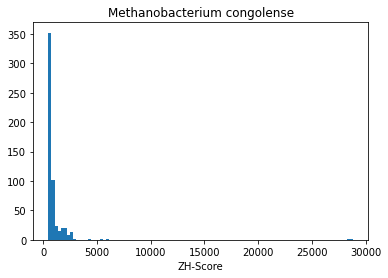

In [46]:
plt.hist(z_1['ZH-Score'], bins = 100)
plt.title('Methanobacterium congolense')
plt.xlabel('ZH-Score')
plt.show()

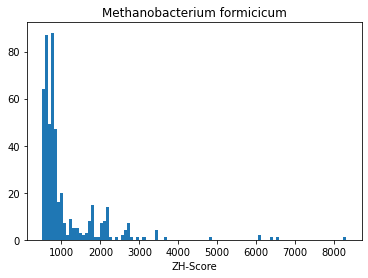

In [47]:
plt.hist(z_2['ZH-Score'], bins = 100)
plt.title('Methanobacterium formicicum')
plt.xlabel('ZH-Score')
plt.show()

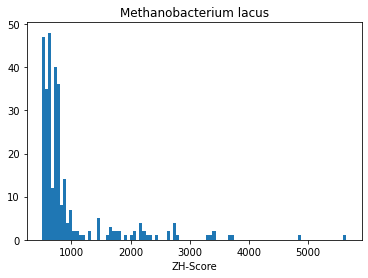

In [48]:
plt.hist(z_3['ZH-Score'], bins = 100)
plt.title('Methanobacterium lacus')
plt.xlabel('ZH-Score')
plt.show()

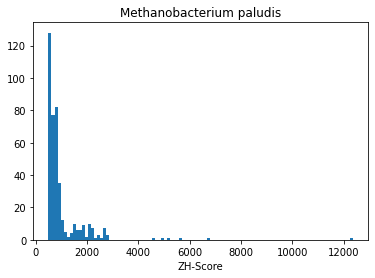

In [49]:
plt.hist(z_4['ZH-Score'], bins = 100)
plt.title('Methanobacterium paludis')
plt.xlabel('ZH-Score')
plt.show()

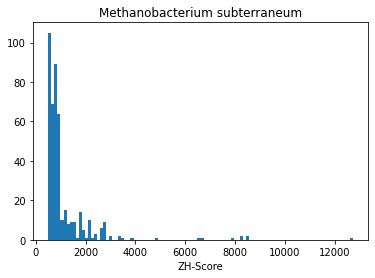

In [50]:
plt.hist(z_5['ZH-Score'], bins = 100)
plt.title('Methanobacterium subterraneum')
plt.xlabel('ZH-Score')
plt.show()

In [51]:
for j in range(1, 6):
  exec(f'tss_set = f_table_{j}[["# feature", "genomic_accession", "start", "end", "strand", "product_accession"]]')
  tss_final = []
  tss_set[["start", "end"]] = tss_set[["start", "end"]].astype(int)
  #pd.DataFrame( columns =  ["# feature", "genomic_accession", "start", "end", "strand", "product_accession"] )
  for k in tss_set.index:
    tss_line = tss_set.iloc[k]
    if tss_line['# feature'] == "CDS":
      if tss_line['strand'] == "+":
        tss_line['end'] = tss_line['start']
      elif tss_line['strand'] == "-":
        tss_line['start'] = tss_line['end']
      if type(tss_line["product_accession"]) is not str:
        tss_line["product_accession"] = "-"
      tss_final.append(tss_line)
  tss_final = pd.DataFrame(tss_final)
  del tss_final['# feature']
  del tss_final['strand']
  exec(f'tss_final.to_csv("TSS{j}.bed", sep = "\t", header=False,index=False)')  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [52]:
!conda install -c bioconda bedtools

Solving environment: \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bedtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.30.0            |       h7d7f7ad_1        17.9 MB  bioconda
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py37h89c1867_0         150 KB  conda-forge
    conda-4.13.0               |   py37h89c1867_1         989 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        19.1 MB

The following NEW packages will be INSTALLED:

  bedtools           bioconda/linux-64::bedtools-2.30.0-h7d7f7ad_1

The following packages will be UPDATED:

  ca-certificates                      2020.12.5-ha878542_0 --> 2022.5.18.1-ha87854

Соединяем участки Z-ДНК и выписываем наибольший скор

In [53]:
! bedtools merge -i Z_1Genome.sorted.bed  -c 5 -o max > merged_1Z.bed
! bedtools merge -i Z_2Genome.sorted.bed  -c 5 -o max > merged_2Z.bed
! bedtools merge -i Z_3Genome.sorted.bed  -c 5 -o max > merged_3Z.bed
! bedtools merge -i Z_4Genome.sorted.bed  -c 5 -o max > merged_4Z.bed
! bedtools merge -i Z_5Genome.sorted.bed  -c 5 -o max > merged_5Z.bed

In [54]:
! head merged_1Z.bed

GCF_900095295	1278	1292	790.8198
GCF_900095295	13426	13434	650.9198
GCF_900095295	18607	18617	650.9198
GCF_900095295	22286	22298	915.9191
GCF_900095295	23456	23468	966.8622
GCF_900095295	37907	37917	908.3955
GCF_900095295	38267	38277	766.6232
GCF_900095295	67769	67782	2183.574
GCF_900095295	72884	72892	980.8116
GCF_900095295	81988	81998	612.3848


In [102]:
! awk '{print $1, $2, $3, $1"_"$2 , $4}' merged_1Z.bed  > merged_1Z_final.bed
! awk '{print $1, $2, $3, $1"_"$2 , $4}' merged_2Z.bed  > merged_2Z_final.bed
! awk '{print $1, $2, $3, $1"_"$2 , $4}' merged_3Z.bed  > merged_3Z_final.bed
! awk '{print $1, $2, $3, $1"_"$2 , $4}' merged_4Z.bed  > merged_4Z_final.bed
! awk '{print $1, $2, $3, $1"_"$2 , $4}' merged_5Z.bed  > merged_5Z_final.bed

In [56]:
! head merged_1Z_final.bed

GCF_900095295 1278 1292 GCF_900095295_1278 790.8198
GCF_900095295 13426 13434 GCF_900095295_13426 650.9198
GCF_900095295 18607 18617 GCF_900095295_18607 650.9198
GCF_900095295 22286 22298 GCF_900095295_22286 915.9191
GCF_900095295 23456 23468 GCF_900095295_23456 966.8622
GCF_900095295 37907 37917 GCF_900095295_37907 908.3955
GCF_900095295 38267 38277 GCF_900095295_38267 766.6232
GCF_900095295 67769 67782 GCF_900095295_67769 2183.574
GCF_900095295 72884 72892 GCF_900095295_72884 980.8116
GCF_900095295 81988 81998 GCF_900095295_81988 612.3848


In [57]:
!conda install -c bioconda samtools

Solving environment: \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    samtools-1.3.1             |                0         1.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following NEW packages will be INSTALLED:

  samtools           bioconda/linux-64::samtools-1.3.1-0



samtools-1.3.1       | 1.5 MB    | : 100% 1.0/1 [00:00<00:00,  1.11it/s]               
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - done


In [58]:
! samtools faidx GCF_900095295.1_MCBB_genomic.fna
! samtools faidx GCF_001458655.1_Mb9_genomic.fna
! samtools faidx GCF_000191585.1_ASM19158v1_genomic.fna
! samtools faidx GCF_000214725.1_ASM21472v1_genomic.fna
! samtools faidx GCF_002813695.1_ASM281369v1_genomic.fna

In [59]:
!bedtools slop -i TSS4.bed -g GCF_900095295.1_MCBB_genomic.fna.fai -b 100 > bd4slop.bed
!bedtools slop -i TSS3.bed -g GCF_001458655.1_Mb9_genomic.fna.fai -b 100 > bd3slop.bed
!bedtools slop -i TSS1.bed -g GCF_000191585.1_ASM19158v1_genomic.fna.fai -b 100 > bd1slop.bed
!bedtools slop -i TSS2.bed -g GCF_000214725.1_ASM21472v1_genomic.fna.fai -b 100 > bd2slop.bed
!bedtools slop -i TSS5.bed -g GCF_002813695.1_ASM281369v1_genomic.fna.fai -b 100 > bd5slop.bed

In [116]:
!awk '{print "GCF_900095295	"$2"	"$3"	"$4}'  bd4slop.bed >  bd4slop_f.bed
!awk '{print "GCF_001458655	"$2"	"$3"	"$4}'  bd3slop.bed >  bd3slop_f.bed
!awk '{print "GCF_000191585	"$2"	"$3"	"$4}'  bd1slop.bed >  bd1slop_f.bed
!awk '{print "GCF_000214725	"$2"	"$3"	"$4}'  bd2slop.bed >  bd2slop_f.bed
!awk '{print "GCF_002813695	"$2"	"$3"	"$4}'  bd5slop.bed >  bd5slop_f.bed

Для нахождения пересекающихся участков нам понадобится утилита ***intersect*** пакета bedtools ([подробная документация с примерами](https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html))

In [114]:
! tr ' ' \\t < merged_1Z_final.bed > merged_1Z_final0.bed
! tr ' ' \\t < merged_2Z_final.bed > merged_2Z_final0.bed
! tr ' ' \\t < merged_3Z_final.bed > merged_3Z_final0.bed
! tr ' ' \\t < merged_4Z_final.bed > merged_4Z_final0.bed
! tr ' ' \\t < merged_5Z_final.bed > merged_5Z_final0.bed

In [122]:
!intersectBed -a merged_1Z_final0.bed -b bd4slop_f.bed -wb > intersected_GCF_900095295.bed
!intersectBed -a merged_2Z_final0.bed -b bd3slop_f.bed -wb > intersected_GCF_001458655.bed
!intersectBed -a merged_3Z_final0.bed -b bd1slop_f.bed -wb > intersected_GCF_000191585.bed
!intersectBed -a merged_4Z_final0.bed -b bd2slop_f.bed -wb > intersected_GCF_000214725.bed
!intersectBed -a merged_5Z_final0.bed -b bd5slop_f.bed -wb > intersected_GCF_002813695.bed

Используем proteinortho

In [62]:
!apt-get install proteinortho
!proteinortho5

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  ncbi-blast+ ncbi-data
The following NEW packages will be installed:
  ncbi-blast+ ncbi-data proteinortho
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 13.2 MB of archives.
After this operation, 67.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ncbi-data all 6.1.20170106-2 [3,645 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ncbi-blast+ amd64 2.6.0-1 [9,446 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proteinortho amd64 5.16+dfsg-1 [143 kB]
Fetched 13.2 MB in 1s (10.5 MB/s)
Selecting previously unselected package ncbi-data.
(Reading database ... 155632 files and directories current

In [67]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/095/295/GCF_900095295.1_MCBB/GCF_900095295.1_MCBB_protein.faa.gz
!gzip -d GCF_900095295.1_MCBB_protein.faa.gz

--2022-06-15 11:28:25--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/900/095/295/GCF_900095295.1_MCBB/GCF_900095295.1_MCBB_protein.faa.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 165.112.9.229, 130.14.250.13, 2607:f220:41e:250::12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|165.112.9.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 435562 (425K) [application/x-gzip]
Saving to: ‘GCF_900095295.1_MCBB_protein.faa.gz.1’

GCF_900095295.1_MCB 100%[===================>] 425.35K  1012KB/s    in 0.4s    

2022-06-15 11:28:26 (1012 KB/s) - ‘GCF_900095295.1_MCBB_protein.faa.gz.1’ saved [435562/435562]



In [68]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/458/655/GCF_001458655.1_Mb9/GCF_001458655.1_Mb9_protein.faa.gz
!gzip -d GCF_001458655.1_Mb9_protein.faa.gz

--2022-06-15 11:29:20--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/458/655/GCF_001458655.1_Mb9/GCF_001458655.1_Mb9_protein.faa.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449318 (439K) [application/x-gzip]
Saving to: ‘GCF_001458655.1_Mb9_protein.faa.gz’

GCF_001458655.1_Mb9 100%[===================>] 438.79K  1015KB/s    in 0.4s    

2022-06-15 11:29:21 (1015 KB/s) - ‘GCF_001458655.1_Mb9_protein.faa.gz’ saved [449318/449318]



In [69]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/191/585/GCF_000191585.1_ASM19158v1/GCF_000191585.1_ASM19158v1_protein.faa.gz
!gzip -d GCF_000191585.1_ASM19158v1_protein.faa.gz

--2022-06-15 11:29:50--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/191/585/GCF_000191585.1_ASM19158v1/GCF_000191585.1_ASM19158v1_protein.faa.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470317 (459K) [application/x-gzip]
Saving to: ‘GCF_000191585.1_ASM19158v1_protein.faa.gz’

GCF_000191585.1_ASM 100%[===================>] 459.29K  1.04MB/s    in 0.4s    

2022-06-15 11:29:51 (1.04 MB/s) - ‘GCF_000191585.1_ASM19158v1_protein.faa.gz’ saved [470317/470317]



In [70]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/214/725/GCF_000214725.1_ASM21472v1/GCF_000214725.1_ASM21472v1_protein.faa.gz
!gzip -d GCF_000214725.1_ASM21472v1_protein.faa.gz

--2022-06-15 11:29:54--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/214/725/GCF_000214725.1_ASM21472v1/GCF_000214725.1_ASM21472v1_protein.faa.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 438567 (428K) [application/x-gzip]
Saving to: ‘GCF_000214725.1_ASM21472v1_protein.faa.gz’

GCF_000214725.1_ASM 100%[===================>] 428.29K   993KB/s    in 0.4s    

2022-06-15 11:29:55 (993 KB/s) - ‘GCF_000214725.1_ASM21472v1_protein.faa.gz’ saved [438567/438567]



In [71]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/813/695/GCF_002813695.1_ASM281369v1/GCF_002813695.1_ASM281369v1_protein.faa.gz
!gzip -d GCF_002813695.1_ASM281369v1_protein.faa.gz

--2022-06-15 11:29:57--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/813/695/GCF_002813695.1_ASM281369v1/GCF_002813695.1_ASM281369v1_protein.faa.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::10, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 452003 (441K) [application/x-gzip]
Saving to: ‘GCF_002813695.1_ASM281369v1_protein.faa.gz’

GCF_002813695.1_ASM 100%[===================>] 441.41K  1.00MB/s    in 0.4s    

2022-06-15 11:29:58 (1.00 MB/s) - ‘GCF_002813695.1_ASM281369v1_protein.faa.gz’ saved [452003/452003]



In [72]:
!proteinortho5 GCF_900095295.1_MCBB_protein.faa GCF_001458655.1_Mb9_protein.faa GCF_000191585.1_ASM19158v1_protein.faa GCF_000214725.1_ASM21472v1_protein.faa GCF_002813695.1_ASM281369v1_protein.faa

*****************************************************************
Proteinortho with PoFF version 5.16 - An orthology detection tool
*****************************************************************
Detected 2 available CPU threads, Detected NCBI BLAST version 2.6.0+
Checking input files
Checking GCF_900095295.1_MCBB_protein.faa... ok
Checking GCF_001458655.1_Mb9_protein.faa... ok
Checking GCF_000191585.1_ASM19158v1_protein.faa... ok
Checking GCF_000214725.1_ASM21472v1_protein.faa... ok
Checking GCF_002813695.1_ASM281369v1_protein.faa... ok

**Step 1**
Generating indices
Building database for 'GCF_000191585.1_ASM19158v1_protein.faa'	(2502 sequences)
Building database for 'GCF_000214725.1_ASM21472v1_protein.faa'	(2411 sequences)
Building database for 'GCF_002813695.1_ASM281369v1_protein.faa'	(2374 sequences)
Building database for 'GCF_001458655.1_Mb9_protein.faa'	(2356 sequences)
Building database for 'GCF_900095295.1_MCBB_protein.faa'	(2319 sequences)

**Step 2**
Running blast analysis:

In [188]:
proteininfo = pd.read_csv("myproject.proteinortho", sep="\t")

Получается всего 2504 кластера

In [77]:
len(proteininfo.index)

2504

Видно, что большая часть кластеров содержит все 5 геномов

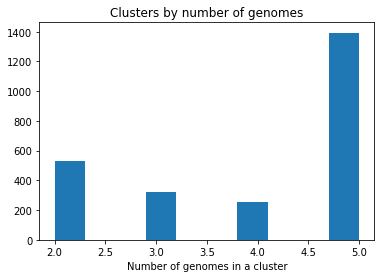

In [87]:
plt.hist(proteininfo['# Species'])
plt.title('Clusters by number of genomes')
plt.xlabel('Number of genomes in a cluster')
plt.show()

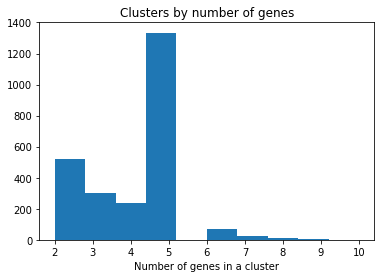

In [89]:
plt.hist(proteininfo['Genes'])
plt.title('Clusters by number of genes')
plt.xlabel('Number of genes in a cluster')
plt.show()

Можем взять кластеры, в которых есть все 5 геномов

In [189]:
proteininfo = proteininfo[proteininfo['# Species'] == 5]
len(proteininfo.index)

1393

In [93]:
proteininfo.head()

,# Species,Genes,Alg.-Conn.,GCF_000191585.1_ASM19158v1_protein.faa,GCF_000214725.1_ASM21472v1_protein.faa,GCF_001458655.1_Mb9_protein.faa,GCF_002813695.1_ASM281369v1_protein.faa,GCF_900095295.1_MCBB_protein.faa
0,5,5,1.0,WP_013643811.1,WP_013826779.1,WP_048072730.1,WP_004029362.1,WP_071907770.1
1,5,5,1.0,WP_013645963.1,WP_013824777.1,WP_197050495.1,WP_004030093.1,WP_171899062.1
2,5,5,1.0,WP_013645956.1,WP_013824784.1,WP_048073079.1,WP_004030100.1,WP_071905913.1
3,5,5,1.0,WP_013645671.1,WP_013825047.1,WP_004030252.1,WP_004030252.1,WP_071906297.1
4,5,5,1.0,WP_013644195.1,WP_013826281.1,WP_048072231.1,WP_004031063.1,WP_071907272.1


Визуализация структуры генов (для оценки консервативности z-dna в генах)

In [63]:
! pip install dna_features_viewer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 20.6 MB/s 
     |████████████████████████████████| 40 kB 6.1 MB/s 
     |████████████████████████████████| 3.1 MB 56.0 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.4 MB/s 
     |████████████████████████████████| 930 kB 54.6 MB/s 
     |████████████████████████████████| 247 kB 47.8 MB/s 


In [64]:
from dna_features_viewer import GraphicFeature, GraphicRecord


In [124]:
inter1 = pd.read_table('intersected_GCF_002813695.bed', sep = '\t', names = ["1","2","3","4", "5", "6", "7", "8", "9"])
inter2 = pd.read_table('intersected_GCF_001458655.bed', sep = '\t', names = ["1","2","3","4", "5", "6", "7", "8", "9"])
inter3 = pd.read_table('intersected_GCF_000191585.bed', sep = '\t', names = ["1","2","3","4", "5", "6", "7", "8", "9"])
inter4 = pd.read_table('intersected_GCF_000214725.bed', sep = '\t', names = ["1","2","3","4", "5", "6", "7", "8", "9"])
inter5 = pd.read_table('intersected_GCF_002813695.bed', sep = '\t', names = ["1","2","3","4", "5", "6", "7", "8", "9"])

In [147]:
inter2.head()

,1,2,3,4,5,6,7,8,9
0,GCF_001458655,8584,8596,GCF_001458655_8584,826.8355,GCF_001458655,8417,8617,WP_048084353.1
1,GCF_001458655,163067,163077,GCF_001458655_163067,766.6232,GCF_001458655,163016,163216,-
2,GCF_001458655,383589,383599,GCF_001458655_383589,1116.6210,GCF_001458655,383412,383612,WP_048071869.1
3,GCF_001458655,397909,397919,GCF_001458655_397909,783.8230,GCF_001458655,397854,398054,WP_048085641.1
4,GCF_001458655,451693,451707,GCF_001458655_451693,2943.4610,GCF_001458655,451638,451838,WP_048071810.1


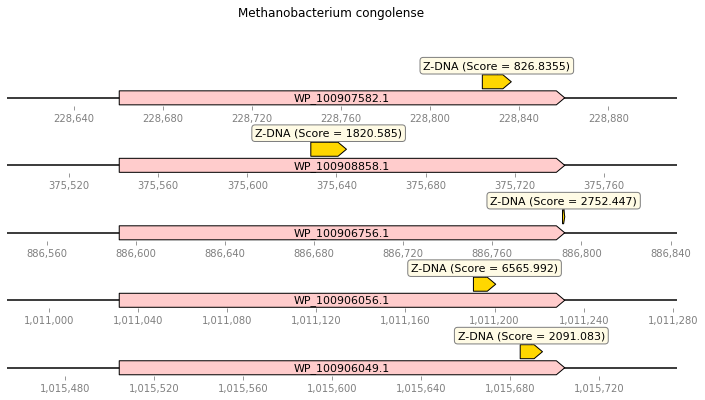

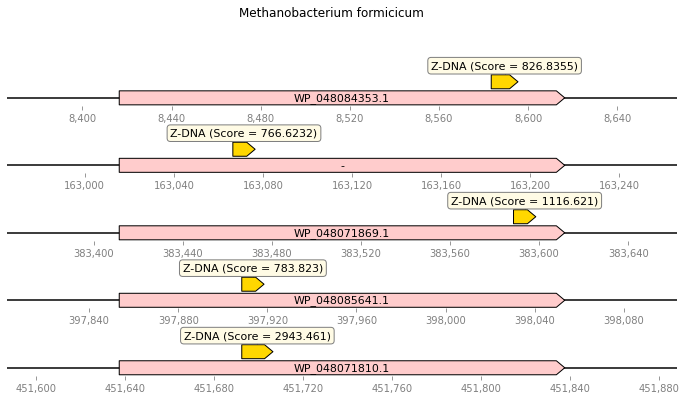

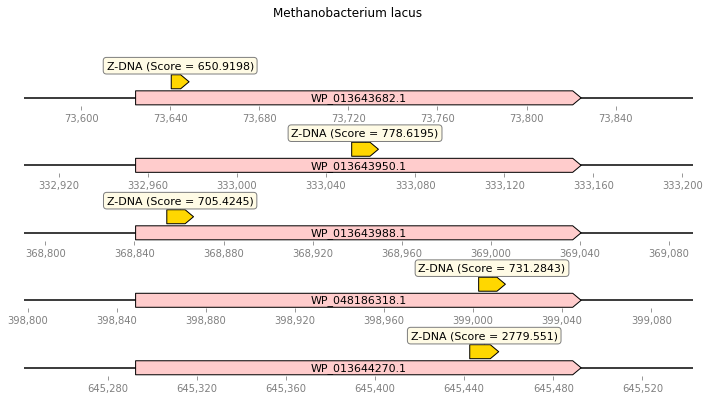

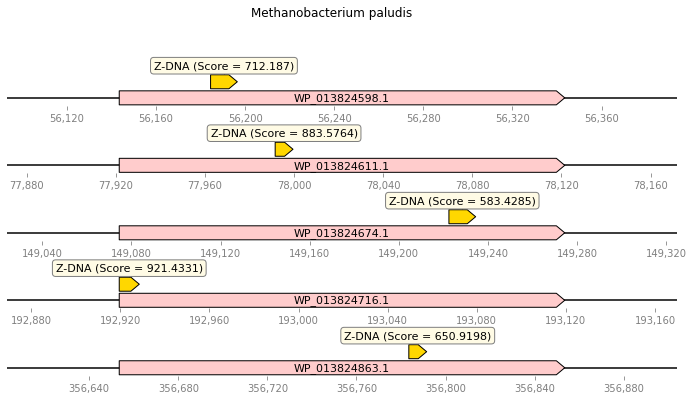

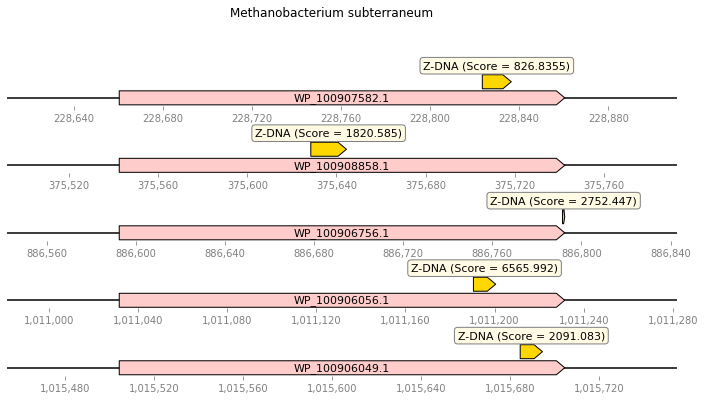

In [146]:
for numbr, name in enumerate([inter1,inter2,inter3,inter4,inter5]):
    fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(12, 6))
    fig.suptitle(sum_table['organism'][numbr])
    for i, row in name.iterrows():
        strand = +1 
        features = [ GraphicFeature(start=row['2'], end=row['3'], strand=strand, color="#ffd700", label='Z-DNA (Score = ' + str(row['5']) + ')'),
                  GraphicFeature(start=row['7'], end=row['8'], strand=strand, color="#ffcccc", label=row['9'])]
        record = GraphicRecord(sequence_length= (row['8'] - row['7'] + 100), features=features, first_index= (row['7'] - 50))
        record.plot(ax=ax[i])
        if i == 4: 
          break

In [272]:
bank = [inter1["9"], inter2["9"], inter3["9"], inter4["9"], inter5["9"]]
getgenes = []
final_protein = pd.DataFrame()
for num, name in enumerate(proteininfo.columns[3:8]):
  for genname in bank[num]: 
    getgenes.append(genname)  
  for rou in proteininfo[name]:
    if rou in getgenes:
      final_protein = final_protein.append(proteininfo.loc[proteininfo[name] == rou])

Всего 45 кластеров

In [275]:
len(final_protein)

45

In [273]:
final_protein = final_protein.sort_values(by = 'Alg.-Conn.', ascending=False)

Возьмём 10 кластеров для дальнейшего анализа

In [276]:
final_protein = final_protein.head(n=10)

In [277]:
final_protein

,# Species,Genes,Alg.-Conn.,GCF_000191585.1_ASM19158v1_protein.faa,GCF_000214725.1_ASM21472v1_protein.faa,GCF_001458655.1_Mb9_protein.faa,GCF_002813695.1_ASM281369v1_protein.faa,GCF_900095295.1_MCBB_protein.faa
42,5,5,1.0,WP_013645736.1,WP_013825016.1,WP_048073653.1,WP_100904601.1,WP_071906239.1
260,5,5,1.0,WP_013643862.1,WP_013826693.1,WP_048072637.1,WP_100905467.1,WP_071907703.1
322,5,5,1.0,WP_013643969.1,WP_013826550.1,WP_048072475.1,WP_100905610.1,WP_071907570.1
327,5,5,1.0,WP_013643988.1,WP_013826531.1,WP_060538018.1,WP_100905627.1,WP_071907553.1
420,5,5,1.0,WP_013644194.1,WP_013826282.1,WP_048084752.1,WP_100905840.1,WP_071907273.1
451,5,5,1.0,WP_013644243.1,WP_013826225.1,WP_048072181.1,WP_100905890.1,WP_071907221.1
452,5,5,1.0,WP_013644244.1,WP_013826224.1,WP_048072180.1,WP_100905891.1,WP_071907220.1
462,5,5,1.0,WP_013644265.1,WP_013826204.1,WP_048084711.1,WP_100905906.1,WP_071907202.1
472,5,5,1.0,WP_013644288.1,WP_013826082.1,WP_048072135.1,WP_100905942.1,WP_071907161.1
498,5,5,1.0,WP_013644387.1,WP_013825975.1,WP_048071996.1,WP_100906034.1,WP_071907039.1
